1. Group by

In [68]:
import pandas as pd

PATH = 'C:/Users/Master/MulCam/20240325_29(2week)/raw_sales.csv'

sales = pd.read_csv(PATH)
sales.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [69]:
#연도별(그룹:연도)로 묶어서 가격(price)를 보고 싶어요  
sales['datesold'] = pd.to_datetime(sales['datesold'])




In [70]:
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month
sales['day'] = sales['datesold'].dt.day

sales.head(3)


,datesold,postcode,price,propertyType,bedrooms,year,month,day
0,2007-02-07,2607,525000,house,4,2007,2,7
1,2007-02-27,2906,290000,house,3,2007,2,27
2,2007-03-07,2905,328000,house,3,2007,3,7


In [71]:
#sales(매출 데이터)에서 연도별 평균가격 
sales.groupby('year')['price'].agg('mean')

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
2012    552501.369214
2013    553416.296838
2014    592653.761439
2015    626101.342654
2016    635185.311668
2017    671880.551420
2018    660701.042768
2019    634184.218773
Name: price, dtype: float64

In [72]:
sales.groupby('year')['price'].agg('mean').reset_index().head()


,year,price
0,2007,522377.210884
1,2008,493814.162754
2,2009,496092.032959
3,2010,559564.810289
4,2011,566715.110227


In [73]:
sale_year = sales.groupby('year')['price'].agg('mean').reset_index()
sale_year.columns

Index(['year', 'price'], dtype='object')

In [74]:
sale_year.index #시작을 1을 할려면 +1

RangeIndex(start=0, stop=13, step=1)

In [75]:
sale_year.head()


,year,price
0,2007,522377.210884
1,2008,493814.162754
2,2009,496092.032959
3,2010,559564.810289
4,2011,566715.110227


In [76]:
#연도, 자산형태 기준으로 평균가격 알기 

sales.groupby(['year','propertyType'])['price'].agg('mean')
type(sales.groupby(['year','propertyType'])['price'].agg('mean'))

pandas.core.series.Series

In [77]:
sale_yp = sales.groupby(['year','propertyType'])['price'].agg('mean').reset_index()
type(sale_yp)

pandas.core.frame.DataFrame

In [78]:
sale_yp.columns

Index(['year', 'propertyType', 'price'], dtype='object')

In [79]:
agg_dict = {"price":"mean","bedrooms":"mean"}

sales.groupby('propertyType').agg(agg_dict)

,price,bedrooms
propertyType,,
house,647956.128462,3.539467
unit,423106.557279,1.837510


In [80]:
prop_gr = sales.groupby('propertyType').agg(agg_dict).reset_index()
prop_gr.head()

,propertyType,price,bedrooms
0,house,647956.128462,3.539467
1,unit,423106.557279,1.837510


In [81]:
agg_dict = {"price":["mean","median"],"bedrooms":"mean"}
sales.groupby(['propertyType', 'year']).agg(agg_dict)



price            bedrooms
                            mean    median      mean
propertyType year                                   
house        2007  539903.846154  505000.0  3.430769
             2008  506913.006757  454500.0  3.457770
             2009  514341.691498  465000.0  3.498785
             2010  574450.563319  525000.0  3.502911
             2011  587022.567755  525000.0  3.482974
             2012  572388.090571  525000.0  3.498759
             2013  571525.145573  535000.0  3.506247
             2014  612682.280016  559157.0  3.568010
             2015  661248.365341  595000.0  3.580019
             2016  680150.133520  615000.0  3.539683
             2017  734985.299725  665000.0  3.561708
             2018  744013.147346  680250.0  3.555517
             2019  713141.479452  660000.0  3.585127
unit         2007  388350.000000  400000.0  2.235294
             2008  328824.468085  330000.0  1.765957
             2009  378090.314136  370000.0  1.858639
             2010  446564.674033  420000.0  1.977901
             2011  416084.020619  405000.0  1.881443
             2012  422186.756098  405625.0  1.845528
             2013  433494.028777  410500.0  1.924460
             2014  451610.233146  410000.0  1.983146
             2015  430227.935135  390000.0  1.877477
             2016  427311.969784  385000.0  1.807194
             2017  420431.334797  385000.0  1.811196
             2018  420654.898390  390000.0  1.751509
             2019  411885.815427  382500.0  1.807163

In [134]:
sales_prop_year = sales.groupby(['propertyType', 'year' ]).agg(agg_dict ).reset_index()
sales_prop_year.head()


propertyType  year          price            bedrooms
                               mean    median      mean
0        house  2007  539903.846154  505000.0  3.430769
1        house  2008  506913.006757  454500.0  3.457770
2        house  2009  514341.691498  465000.0  3.498785
3        house  2010  574450.563319  525000.0  3.502911
4        house  2011  587022.567755  525000.0  3.482974

In [83]:
sales_prop_year.columns

MultiIndex([('propertyType',       ''),
            (        'year',       ''),
            (       'price',   'mean'),
            (       'price', 'median'),
            (    'bedrooms',   'mean')],
           )

결측치 처리

- 결측치 대체
  - 숫자 컬럼 : 평균 또는 중위수(중간값) (평균값은 이상치에 민감)
  - 문자 컬럼 : 최빈값 (비추, 최후의 방법)
- 컬럼 삭제 drop() (데이터의 동질성을 위할 때만 신중히 사용)
  
- (실무용) 행 삭제: 컬럼 갯수가 10개, 결측치 컬럼 6개

In [84]:
df = pd. DataFrame ({
    "연도" : [2017,2018,2019,2020, 2021,2022],
    "키" : [160,162,165,None, None, 161],
    "몸무게" : [53,52, None, 50,51,54],
    "시력" : [1.2, None, 1.2,1.2,1.1,0.8],
    "병결" : [None, None, None, 2, None, 1],
})

In [85]:
df.head()

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,NaN
1,2018,162.0,52.0,NaN,NaN
2,2019,165.0,NaN,1.2,NaN
3,2020,NaN,50.0,1.2,2.0
4,2021,NaN,51.0,1.1,NaN


In [86]:
df.drop('병결',axis=1) 
#행세연가  axis = 0(기본값) 행 axis = 1 열 

,연도,키,몸무게,시력
0,2017,160.0,53.0,1.2
1,2018,162.0,52.0,NaN
2,2019,165.0,NaN,1.2
3,2020,NaN,50.0,1.2
4,2021,NaN,51.0,1.1
5,2022,161.0,54.0,0.8


In [87]:
df.dropna() #na가 존재하면 다 지움



,연도,키,몸무게,시력,병결
5,2022,161.0,54.0,0.8,1.0


In [88]:
df.dropna(how='all')
#all : 모든게 non일때만 제거 

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,NaN
1,2018,162.0,52.0,NaN,NaN
2,2019,165.0,NaN,1.2,NaN
3,2020,NaN,50.0,1.2,2.0
4,2021,NaN,51.0,1.1,NaN
5,2022,161.0,54.0,0.8,1.0


In [89]:
df.dropna(how='any')
#any : 하나라도 none 있으면 제거 

,연도,키,몸무게,시력,병결
5,2022,161.0,54.0,0.8,1.0


In [90]:
df.dropna(thresh=4)
#na가 아닌 null값의 수가 4보다 작은 데이터프레임에서 행을 제거하는 데 사용 
# >> na가 아닌 값이 4개 이상은 있어야 함.
#na가 아닌 값이 4개 미만이면? 행은 삭제됨 

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,NaN
3,2020,NaN,50.0,1.2,2.0
5,2022,161.0,54.0,0.8,1.0


결측치 대체 

In [91]:
import seaborn as sns

t = sns.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [92]:
t.shape

(891, 15)

In [93]:
t.info()
#null값, 자료형(데이터타입) 값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [94]:
#null 값 확인

t.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [95]:
t['age'].mean() #평균(일반적)

29.69911764705882

In [96]:
t['age'].median() #중위수(이상치에 민감)


28.0

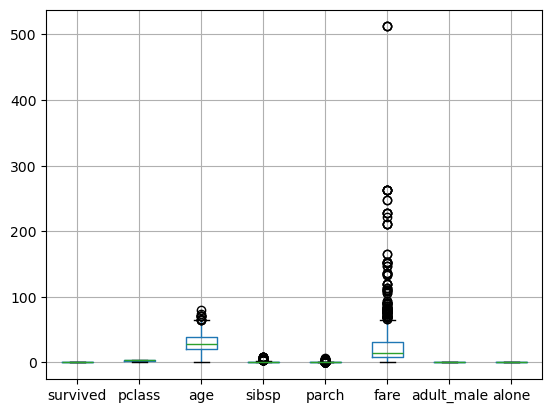

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

t.boxplot()
plt.show()

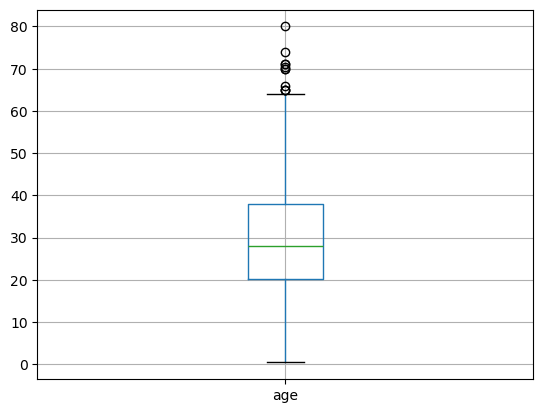

In [98]:
#t['age'].boxplot() 에러 

import pandas as pd
import matplotlib.pyplot as plt

t.boxplot(column=['age'])
plt.show()

In [99]:
#평균(일반적) 또는 중위수(이상치에 민감한 평도 대체)
# titanic 데이터서는 median (중위수) 사용 예정 #왜? boxpLot(나무상자 그림) 그려본 결과,
#age 데이터의 이상치가 많이 분포되어 있어 이상치에 민감한 평균으로 대체보다. 중위수로 대체하는 것이 합리적임

In [100]:
#참고 '0'으로 값 대체 원할 시 fillna(0)
t['age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [101]:
#중위수로 대체 median
t['age'].fillna(t['age'].median())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [102]:
t['age'] = t['age'].fillna(t['age'].median())
t.isnull().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [103]:
t['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [104]:
t['embarked'].value_counts()


embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [105]:
t['embarked'].mode() #최빈값


0    S
Name: embarked, dtype: object

In [106]:
#t['embarked'] = 문자 (빈도수 mode())

#t['embarked'] = t['embarked'].fillna('S')

t['embarked']= t['embarked'].fillna(t['embarked'].mode()[0])


In [107]:
t.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [108]:
t['deck'].value_counts() #값마다 개수 

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [109]:
t.drop('deck', axis=1).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [110]:

t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


결측치 처리

* 결측치 비율에 따른 행 제거

In [111]:
import pandas as pd 
import numpy as np

#임의로/무작위(random) 샘플 생성 

np.random.seed(0) #초기 seed(설정)값

data = {
    'A' : np.random.choice([1,2,np.nan], size=10),
    'B' : np.random.choice([3,4,np.nan], size=10),
    'C' : np.random.choice([5,6,np.nan], size=10),
    'D' : np.random.choice([7,8,np.nan], size=10),
    'E' : np.random.choice([9,10,np.nan], size=10),
    
}

In [112]:
data

{'A': array([ 1.,  2.,  1.,  2.,  2., nan,  1., nan,  1.,  1.]),
 'B': array([ 3., nan,  4., nan, nan,  3.,  4.,  4.,  4.,  4.]),
 'C': array([ 5.,  6.,  5.,  5.,  6., nan,  5., nan,  5.,  6.]),
 'D': array([ 8., nan,  7.,  8.,  8.,  8.,  7., nan,  7., nan]),
 'E': array([nan,  9., nan,  9.,  9.,  9., 10., 10., nan,  9.])}

In [113]:
df = pd.DataFrame(data)
df

,A,B,C,D,E
0,1.0,3.0,5.0,8.0,NaN
1,2.0,NaN,6.0,NaN,9.0
2,1.0,4.0,5.0,7.0,NaN
3,2.0,NaN,5.0,8.0,9.0
4,2.0,NaN,6.0,8.0,9.0
5,NaN,3.0,NaN,8.0,9.0
6,1.0,4.0,5.0,7.0,10.0
7,NaN,4.0,NaN,NaN,10.0
8,1.0,4.0,5.0,7.0,NaN
9,1.0,4.0,6.0,NaN,9.0


In [114]:
df.isnull()
df.isnull().sum()


A    2
B    3
C    2
D    3
E    3
dtype: int64

In [115]:
df.isnull().mean(axis=0) #axis = 0 서로 다른 행끼리 

A    0.2
B    0.3
C    0.2
D    0.3
E    0.3
dtype: float64

In [116]:
df.isnull().mean(axis=1) #axis = 1 서로 다른 열끼리 


0    0.2
1    0.4
2    0.2
3    0.2
4    0.2
5    0.4
6    0.0
7    0.6
8    0.2
9    0.2
dtype: float64

In [117]:
df['na_ratio'] = df.isnull().mean(axis =1)
df

,A,B,C,D,E,na_ratio
0,1.0,3.0,5.0,8.0,NaN,0.2
1,2.0,NaN,6.0,NaN,9.0,0.4
2,1.0,4.0,5.0,7.0,NaN,0.2
3,2.0,NaN,5.0,8.0,9.0,0.2
4,2.0,NaN,6.0,8.0,9.0,0.2
5,NaN,3.0,NaN,8.0,9.0,0.4
6,1.0,4.0,5.0,7.0,10.0,0.0
7,NaN,4.0,NaN,NaN,10.0,0.6
8,1.0,4.0,5.0,7.0,NaN,0.2
9,1.0,4.0,6.0,NaN,9.0,0.2


In [118]:
condition = (df['na_ratio'] <= 0.5)

df.loc[condition,:]

,A,B,C,D,E,na_ratio
0,1.0,3.0,5.0,8.0,NaN,0.2
1,2.0,NaN,6.0,NaN,9.0,0.4
2,1.0,4.0,5.0,7.0,NaN,0.2
3,2.0,NaN,5.0,8.0,9.0,0.2
4,2.0,NaN,6.0,8.0,9.0,0.2
5,NaN,3.0,NaN,8.0,9.0,0.4
6,1.0,4.0,5.0,7.0,10.0,0.0
8,1.0,4.0,5.0,7.0,NaN,0.2
9,1.0,4.0,6.0,NaN,9.0,0.2


In [119]:
df2 = df.loc[condition,:]
df2.head()

,A,B,C,D,E,na_ratio
0,1.0,3.0,5.0,8.0,NaN,0.2
1,2.0,NaN,6.0,NaN,9.0,0.4
2,1.0,4.0,5.0,7.0,NaN,0.2
3,2.0,NaN,5.0,8.0,9.0,0.2
4,2.0,NaN,6.0,8.0,9.0,0.2


In [120]:
df2 = df2.reset_index(drop=True)
df2.head()

,A,B,C,D,E,na_ratio
0,1.0,3.0,5.0,8.0,NaN,0.2
1,2.0,NaN,6.0,NaN,9.0,0.4
2,1.0,4.0,5.0,7.0,NaN,0.2
3,2.0,NaN,5.0,8.0,9.0,0.2
4,2.0,NaN,6.0,8.0,9.0,0.2


In [121]:
#함수로 

def remove_na(df, threshold=0.5):

    na_ratio = df.isnull().mean(axis=1)
    result = df.loc[na_ratio < threshold,:].reset_index(drop=True)
    return result

In [122]:
remove_na(df, threshold=0.5)

,A,B,C,D,E,na_ratio
0,1.0,3.0,5.0,8.0,NaN,0.2
1,2.0,NaN,6.0,NaN,9.0,0.4
2,1.0,4.0,5.0,7.0,NaN,0.2
3,2.0,NaN,5.0,8.0,9.0,0.2
4,2.0,NaN,6.0,8.0,9.0,0.2
5,NaN,3.0,NaN,8.0,9.0,0.4
6,1.0,4.0,5.0,7.0,10.0,0.0
7,1.0,4.0,5.0,7.0,NaN,0.2
8,1.0,4.0,6.0,NaN,9.0,0.2


피봇 테이블(pivot table) 과 melt 

In [123]:
import pandas as pd 

sl = {
    "ID" : [1,1,1,2,2,2],
    "반" : ['A','B','A','B','A','B'],
    "성적" : [100,88,85,75,100,80]
}

sl

{'ID': [1, 1, 1, 2, 2, 2],
 '반': ['A', 'B', 'A', 'B', 'A', 'B'],
 '성적': [100, 88, 85, 75, 100, 80]}

In [124]:
pd.DataFrame(sl)

,ID,반,성적
0,1,A,100
1,1,B,88
2,1,A,85
3,2,B,75
4,2,A,100
5,2,B,80


In [125]:
df = pd.DataFrame(sl)
df.head()

,ID,반,성적
0,1,A,100
1,1,B,88
2,1,A,85
3,2,B,75
4,2,A,100


In [126]:
df.pivot_table(index = ['ID'],
               columns=['반'],
               values=['성적'],
               aggfunc='mean')

성적      
반       A     B
ID             
1    92.5  88.0
2   100.0  77.5

In [127]:
import seaborn as sns 

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [128]:
tips.pivot_table(index=['day','sex'],
                columns = ['time'],
                values= ['tip','total_bill'],
                aggfunc = 'mean')


tip           total_bill           
time            Lunch    Dinner      Lunch     Dinner
day  sex                                             
Thur Male    2.980333       NaN  18.714667        NaN
     Female  2.561935  3.000000  16.648710  18.780000
Fri  Male    1.900000  3.032857  11.386667  23.487143
     Female  2.745000  2.810000  13.940000  14.310000
Sat  Male         NaN  3.083898        NaN  20.802542
     Female       NaN  2.801786        NaN  19.680357
Sun  Male         NaN  3.220345        NaN  21.887241
     Female       NaN  3.367222        NaN  19.872222

melt

In [129]:
df = sns.load_dataset('penguins')

In [130]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [131]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

1. 판다스 melt

-판다스의 melt는 데이터 프레임 구조 변경시 사용

2. 판다스 melt 구조

-pd.melt(data frame, id_vars, value_vars, var_name,value_name)

-id_vars : vars(variables(변수) 약자) 리스트(식별자)

-value_vars : melt하고 싶은 컬럼의 리스트 

-var_name : melt된 컬럼들의 이름을 저장할 새로운 컬럼명

-value_name : melt된 값들을 저장한 새로운 컬럼 

In [132]:
pd.melt(df,
        id_vars=['species','island','sex'],
        value_vars=['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g'],
        var_name='measurment',
        value_name='value'
       )

,species,island,sex,measurment,value
0,Adelie,Torgersen,Male,bill_length_mm,39.1
1,Adelie,Torgersen,Female,bill_length_mm,39.5
2,Adelie,Torgersen,Female,bill_length_mm,40.3
3,Adelie,Torgersen,NaN,bill_length_mm,NaN
4,Adelie,Torgersen,Female,bill_length_mm,36.7
...,...,...,...,...,...
1371,Gentoo,Biscoe,NaN,body_mass_g,NaN
1372,Gentoo,Biscoe,Female,body_mass_g,4850.0
1373,Gentoo,Biscoe,Male,body_mass_g,5750.0
1374,Gentoo,Biscoe,Female,body_mass_g,5200.0
